In [66]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

In [67]:
r = requests.get('http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip').content

In [68]:
s = StringIO.StringIO(r)

In [69]:
zf = zipfile.ZipFile(s,'r')

In [70]:
tablenames = zf.namelist()

In [71]:
print tablenames

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


In [72]:
teams = pd.read_csv(zf.open(tablenames[tablenames.index('Teams.csv')]))
players = pd.read_csv(zf.open(tablenames[tablenames.index('Batting.csv')]))
salaries = pd.read_csv(zf.open(tablenames[tablenames.index('Salaries.csv')]))
fielding = pd.read_csv(zf.open(tablenames[tablenames.index('Fielding.csv')]))
master = pd.read_csv(zf.open(tablenames[tablenames.index('Master.csv')]))

In [73]:
tmp_salaries = salaries.groupby('playerID')['playerID','salary'].median()
tmp_salaries.head()

,salary
playerID,
aardsda01,419000
aasedo01,612500
abadan01,327000
abadfe01,451500
abbotje01,255000


In [74]:
tmp_master = master[["playerID", 'nameFirst', 'nameLast']]
medianSalaries = tmp_master.merge(tmp_salaries, how = 'inner', right_index = True, left_on = 'playerID')

In [75]:
medianSalaries.head()

,playerID,nameFirst,nameLast,salary
0,aardsda01,David,Aardsma,419000
3,aasedo01,Don,Aase,612500
4,abadan01,Andy,Abad,327000
5,abadfe01,Fernando,Abad,451500
13,abbotje01,Jeff,Abbott,255000


In [76]:
teams.columns

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

In [77]:
filtered_teams = teams[(teams.yearID >= 1947) & (teams.G == 162)].copy()
filtered_teams['PA'] = filtered_teams['AB'] + filtered_teams['BB']
filtered_teams['1B'] = filtered_teams['H'] - filtered_teams['2B'] - filtered_teams['3B'] - filtered_teams['HR']
stats = filtered_teams[['teamID','yearID','W']].copy()
stats['1B'] = filtered_teams['1B'] / filtered_teams.PA
stats['2B'] = filtered_teams['2B'] / filtered_teams.PA
stats['3B'] = filtered_teams['3B'] / filtered_teams.PA
stats['HR'] = filtered_teams['HR'] / filtered_teams.PA
stats['BB'] = filtered_teams['BB'] / filtered_teams.PA
stats.head()

,teamID,yearID,W,1B,2B,3B,HR,BB
1366,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548
1367,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618
1377,NYA,1962,96,0.167148,0.038536,0.004656,0.031952,0.093770
1379,LAA,1962,86,0.159482,0.038027,0.005737,0.022455,0.098672
1381,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076


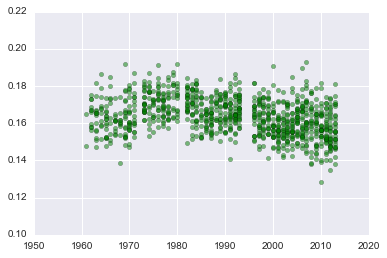

In [78]:
plt.scatter(stats.yearID, stats['1B'], c = 'g', alpha = 0.5)

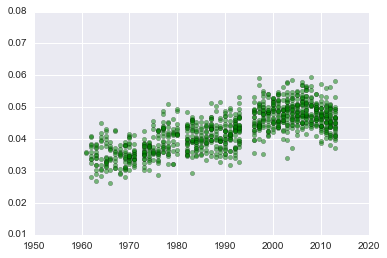

In [79]:
plt.scatter(stats.yearID, stats['2B'], c = 'g', alpha = 0.5)

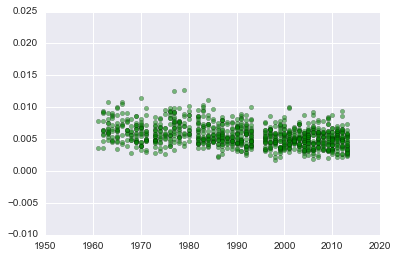

In [80]:
plt.scatter(stats.yearID, stats['3B'], c = 'g', alpha = 0.5)

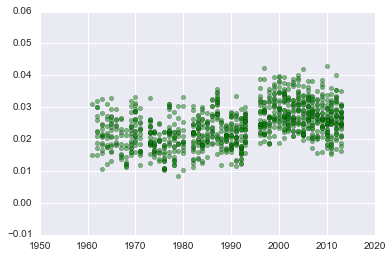

In [81]:
plt.scatter(stats.yearID, stats['HR'], c = 'g', alpha = 0.5)

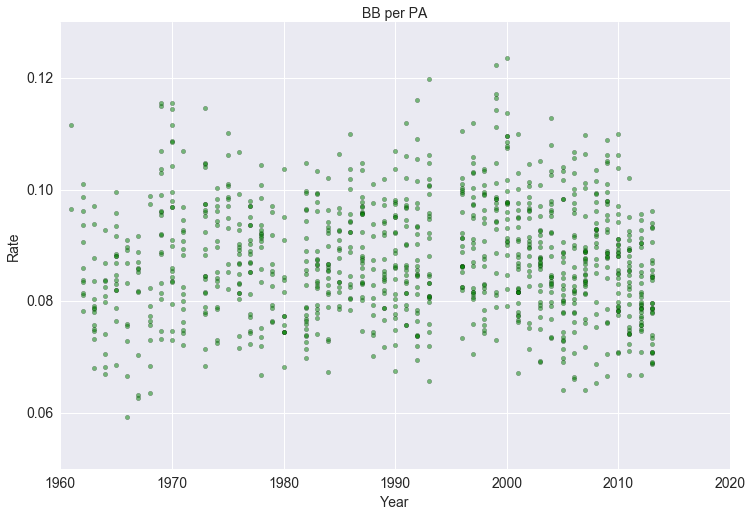

In [82]:
plt.figure(figsize=(12,8), dpi = 50)
plt.scatter(stats.yearID, stats['BB'], c = 'g', alpha = 0.5)
plt.xlabel('Year',fontsize = 14)
plt.xlim(1960, 2016)
plt.xticks([1960,1970,1980,1990,2000,2010,2020],fontsize = 14)

plt.ylabel('Rate',fontsize = 14)
plt.ylim(0.05, 0.13)
plt.yticks(fontsize = 14)
plt.yticks([0.06,0.08,0.10,0.12],fontsize = 14)

plt.title('BB per PA',fontsize = 14)

In [83]:
stats.groupby('yearID').mean().head()

,W,1B,2B,3B,HR,BB
yearID,,,,,,
1961,65.500000,0.156249,0.035845,0.005717,0.022975,0.104083
1962,78.454545,0.165632,0.035853,0.006777,0.023811,0.088590
1963,78.142857,0.162467,0.034020,0.006896,0.021254,0.080336
1964,81.727273,0.167251,0.036336,0.006748,0.021548,0.079152
1965,82.000000,0.160042,0.035539,0.006534,0.022693,0.085745


In [84]:
def MeanNormalize(df):
    subdf = df[['1B','2B','3B','HR','BB']]
    df[['1B','2B','3B','HR','BB']] = subdf - subdf.mean()
    return df

In [85]:
stats = stats.groupby('yearID').apply(MeanNormalize)

In [86]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [87]:
stat_train = stats[stats.yearID < 2002]
stat_test = stats[stats.yearID >= 2002]

XX_train = stat_train[['1B','2B','3B','HR','BB']]
XX_test  = stat_test[['1B','2B','3B','HR','BB']]

YY_train = stat_train.W
YY_test  = stat_test.W

clf.fit(XX_train, YY_train)
clf.coef_

print("Mean squared error: %.2f" % np.mean((YY_test - clf.predict(XX_test)) ** 2))

Mean squared error: 83.82


In [88]:
sub_players = players[(players.yearID > 1947) & (players['AB']+players['BB'] > 500)]

In [89]:
sub_players = sub_players[['playerID','yearID','AB','H','2B','3B','HR','BB']]

In [90]:
sub_players['1B'] = sub_players['H'] - sub_players['2B'] - sub_players['3B'] - sub_players['HR']
sub_players['PA'] = sub_players['AB'] + sub_players['BB']

In [91]:
sub_players['1B'] = sub_players['1B']/sub_players['PA']
sub_players['2B'] = sub_players['2B']/sub_players['PA']
sub_players['3B'] = sub_players['3B']/sub_players['PA']
sub_players['HR'] = sub_players['HR']/sub_players['PA']
sub_players['BB'] = sub_players['BB']/sub_players['PA']

In [92]:
players_stat = sub_players[['playerID','yearID','1B','2B','3B','HR','BB']]

In [93]:
playerstats = players_stat.groupby('yearID').apply(MeanNormalize)

In [94]:
def MeanNormalizeLS(df):
    df = df[['1B','2B','3B','HR','BB']].mean()
    return df

In [95]:
playerLS = playerstats.groupby("playerID").apply(MeanNormalizeLS).reset_index()

In [96]:
playerLS = master[["playerID","debut","finalGame"]].merge(playerLS, how = "inner", on = "playerID")

In [97]:
playerLS.head()

,playerID,debut,finalGame,1B,2B,3B,HR,BB
0,aaronha01,1954-04-13,1976-10-03,-0.007157,0.006539,-0.000270,0.027850,0.009447
1,abramca01,1949-04-20,1956-05-09,0.013463,-0.023915,0.002384,0.003842,0.019455
2,abreubo01,1996-09-01,2012-10-02,-0.008202,0.006421,0.001002,-0.003252,0.050501
3,ackledu01,2011-06-17,2013-09-29,-0.009270,-0.016605,-0.001974,-0.015274,0.001597
4,adairje01,1958-09-02,1970-05-03,0.011933,0.003286,-0.002139,-0.012934,-0.037229


In [98]:
def getYear(s):
    return int(s[0:4])
playerLS['debut'] = playerLS['debut'].apply(getYear)
playerLS['finalGame'] = playerLS['finalGame'].apply(getYear)

In [99]:
cols = list(playerLS.columns)

In [100]:
cols[1:3] = ["minYear","maxYear"]

In [101]:
playerLS.columns = cols

In [102]:
playerLS.head()

,playerID,minYear,maxYear,1B,2B,3B,HR,BB
0,aaronha01,1954,1976,-0.007157,0.006539,-0.000270,0.027850,0.009447
1,abramca01,1949,1956,0.013463,-0.023915,0.002384,0.003842,0.019455
2,abreubo01,1996,2012,-0.008202,0.006421,0.001002,-0.003252,0.050501
3,ackledu01,2011,2013,-0.009270,-0.016605,-0.001974,-0.015274,0.001597
4,adairje01,1958,1970,0.011933,0.003286,-0.002139,-0.012934,-0.037229


In [103]:
avgRates = playerLS[["1B","2B","3B","HR","BB"]].values

In [104]:
playerLS["OPW"] = clf.predict(avgRates)

In [105]:
playerLS = playerLS.merge(medianSalaries, how = "inner", on = "playerID")

In [106]:
sub_fielding = fielding[['playerID','POS']].copy()

In [107]:
sub_fielding['Counter'] = 1
positions = sub_fielding.groupby(['playerID','POS'])['Counter'].sum()

In [108]:
positions = pd.DataFrame(positions).reset_index()

In [109]:
which = positions.groupby('playerID')['Counter'].idxmax()

In [110]:
pos = positions.iloc[which,:]

In [111]:
pos.head()

,playerID,POS,Counter
0,aardsda01,P,8
7,aaronha01,OF,23
9,aaronto01,1B,7
16,aasedo01,P,13
17,abadan01,1B,2


In [112]:
playerLS = pos[['playerID','POS']].merge(playerLS, how = 'inner', on = "playerID")
playerLS.head()

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,OPW,nameFirst,nameLast,salary
0,abreubo01,RF,1996,2012,-0.008202,0.006421,0.001002,-0.003252,0.050501,104.050008,Bobby,Abreu,9000000
1,ackledu01,1B,2011,2013,-0.009270,-0.016605,-0.001974,-0.015274,0.001597,53.806003,Dustin,Ackley,2400000
2,adamsru01,SS,2004,2009,-0.007867,-0.001289,0.004160,-0.017533,0.002672,67.496507,Russ,Adams,329500
3,alfoned01,2B,1995,2006,0.013485,-0.002177,-0.003239,-0.006436,0.010745,83.404437,Edgardo,Alfonzo,4112500
4,alicelu01,2B,1988,2002,0.035625,-0.009597,0.007988,-0.026156,-0.006580,78.561778,Luis,Alicea,750000


In [113]:
sub_playerLS = playerLS[(playerLS.minYear <= 2002) & (playerLS.maxYear >= 2003) & (playerLS.maxYear - playerLS.minYear >= 3)].copy()

In [114]:
sub_playerLS.head()

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,OPW,nameFirst,nameLast,salary
0,abreubo01,RF,1996,2012,-0.008202,0.006421,0.001002,-0.003252,0.050501,104.050008,Bobby,Abreu,9000000
3,alfoned01,2B,1995,2006,0.013485,-0.002177,-0.003239,-0.006436,0.010745,83.404437,Edgardo,Alfonzo,4112500
5,allench01,LF,1999,2005,0.023014,-0.009664,0.000201,-0.016584,-0.031390,58.526131,Chad,Allen,240000
7,alomaro01,2B,1988,2004,0.022145,0.001698,0.002653,-0.009386,0.004503,90.800847,Roberto,Alomar,5466667
9,aloumo01,OF,1990,2008,0.004058,0.001022,-0.000406,0.009994,0.000737,92.104556,Moises,Alou,5135000


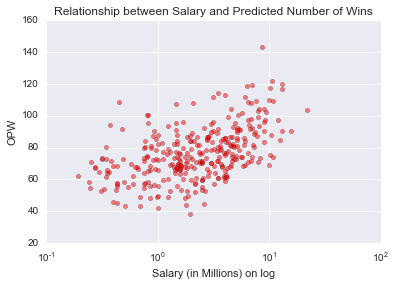

In [115]:
fig = plt.figure()
ax = fig.gca()
plt.scatter(sub_playerLS.salary/10**6,sub_playerLS.OPW,alpha=0.5,c='red')
ax.set_xscale('log')
ax.set_xlabel('Salary (in Millions) on log')
ax.set_ylabel('OPW')
ax.set_title('Relationship between Salary and Predicted Number of Wins')
plt.show()

In [119]:
sub_playerLS['salary'] = sub_playerLS['salary']*10**6

In [127]:
sub_playerLS['OPW/SALARY'] = sub_playerLS['OPW']/sub_playerLS['salary']

In [128]:
C = sub_playerLS[sub_playerLS['POS'] == 'C']
ONEB = sub_playerLS[sub_playerLS['POS'] == '1B']
TWOB = sub_playerLS[sub_playerLS['POS'] == '2B']
THREEB = sub_playerLS[sub_playerLS['POS'] == '3B']
SS = sub_playerLS[sub_playerLS['POS'] == 'SS']
LF = sub_playerLS[sub_playerLS['POS'] == 'LF']
CF = sub_playerLS[sub_playerLS['POS'] == 'CF']
RF = sub_playerLS[sub_playerLS['POS'] == 'RF']
DH = sub_playerLS[sub_playerLS['POS'] == 'DH']
OF = sub_playerLS[sub_playerLS['POS'] == 'OF']

In [193]:
print THREEB.salary.mean()

3.49645828125


In [259]:
TWOB.sort_values(['OPW','OPW/SALARY'],ascending = [0,0])

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,OPW,nameFirst,nameLast,salary,OPW/SALARY
828,spiveju01,2B,2001,2005,0.015970,0.005593,0.005126,-0.008065,0.008046,95.189726,Junior,Spivey,0.816000,116.654075
55,bellhma01,2B,1997,2007,-0.039044,0.002241,0.001326,0.005377,0.046554,91.598047,Mark,Bellhorn,0.477500,191.828371
7,alomaro01,2B,1988,2004,0.022145,0.001698,0.002653,-0.009386,0.004503,90.800847,Roberto,Alomar,5.466667,16.609910
157,castilu01,2B,1996,2010,0.062179,-0.023741,0.003471,-0.030511,0.012767,86.721761,Luis,Castillo,4.666667,18.583233
239,derosma01,2B,1998,2013,0.007927,0.004981,-0.000685,-0.006713,0.005630,83.984873,Mark,DeRosa,0.775000,108.367578
500,kentje01,2B,1992,2008,-0.009952,0.010132,-0.000569,0.010217,-0.009517,83.900680,Jeff,Kent,6.000000,13.983447
384,hallbi03,2B,2002,2012,-0.032260,0.016176,0.003551,0.011651,-0.004524,83.586622,Bill,Hall,3.062500,27.293591
3,alfoned01,2B,1995,2006,0.013485,-0.002177,-0.003239,-0.006436,0.010745,83.404437,Edgardo,Alfonzo,4.112500,20.280714
902,vidrojo01,2B,1997,2008,0.030316,0.012657,-0.003169,-0.010792,-0.015018,82.525957,Jose,Vidro,4.750000,17.373886
337,gilesma01,2B,2001,2007,-0.001402,0.015089,-0.001188,-0.008110,0.005605,82.175840,Marcus,Giles,1.390000,59.119310


In [265]:
dream_team = sub_playerLS.loc[[966,475,828,274,611,236,872,922,582,81],:]

In [266]:
dream_team

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,OPW,nameFirst,nameLast,salary,OPW/SALARY
966,zaungr01,C,1995,2010,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,82.532772,Gregg,Zaun,1.000000,82.532772
475,johnsni01,1B,2001,2012,-0.030406,0.018102,-0.002523,-0.000333,0.072075,107.537577,Nick,Johnson,1.450000,74.163846
828,spiveju01,2B,2001,2005,0.015970,0.005593,0.005126,-0.008065,0.008046,95.189726,Junior,Spivey,0.816000,116.654075
274,ensbemo01,3B,2000,2008,-0.033243,-0.003037,-0.000346,0.026321,0.047626,108.584662,Morgan,Ensberg,0.450000,241.299249
611,menecfr01,2B,1999,2005,-0.021680,-0.011214,-0.001739,-0.014485,0.046071,73.581041,Frank,Menechino,0.314750,233.776144
236,delluda01,LF,1997,2009,-0.050673,-0.018869,0.004528,0.024153,0.057238,100.483979,David,Dellucci,0.812500,123.672590
872,torrean02,CF,2002,2013,-0.038587,0.025363,0.009017,-0.003139,0.006371,83.881250,Andres,Torres,1.500000,55.920833
922,werthja01,RF,2002,2013,-0.015169,-0.000742,-0.003539,0.012239,0.032909,95.991832,Jayson,Werth,1.700000,56.465784
582,martied01,DH,1987,2004,0.000910,0.011751,-0.003912,0.004922,0.052827,113.934171,Edgar,Martinez,3.500000,32.552620
81,bondsba01,OF,1986,2007,-0.045184,0.001342,0.001377,0.030717,0.112071,143.101202,Barry,Bonds,8.541667,16.753311


In [267]:
dream_team['salary'].sum()

20.084917

In [268]:
dream_team['OPW'].mean()

100.48182117710651